EDA 2-->Cars sales


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Car Sale.csv"
df = pd.read_csv(file_path)

# Display basic info
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB
         Car_id      Date Customer Name Gender  Annual Income  \
0

In [2]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
dealer_avg_price = df.groupby("Dealer_Name")["Price ($)"].mean()
print("1. Average Selling Price per Dealer:\n", dealer_avg_price)


1. Average Selling Price per Dealer:
 Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     278

In [3]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
# trends?
brand_price_variation = df.groupby("Company")["Price ($)"].std()
highest_variation_brand = brand_price_variation.idxmax()
print("2. Car Brand with Highest Price Variation:", highest_variation_brand)

2. Car Brand with Highest Price Variation: Lincoln


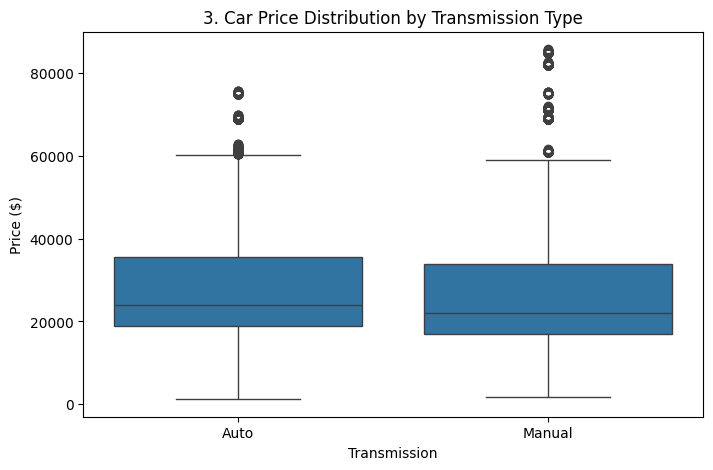

In [4]:
# 3. What is the distribution Of car prices for each transmission type, and how do the interquartile ranges
# compare?
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Transmission"], y=df["Price ($)"])
plt.title("3. Car Price Distribution by Transmission Type")
plt.show()

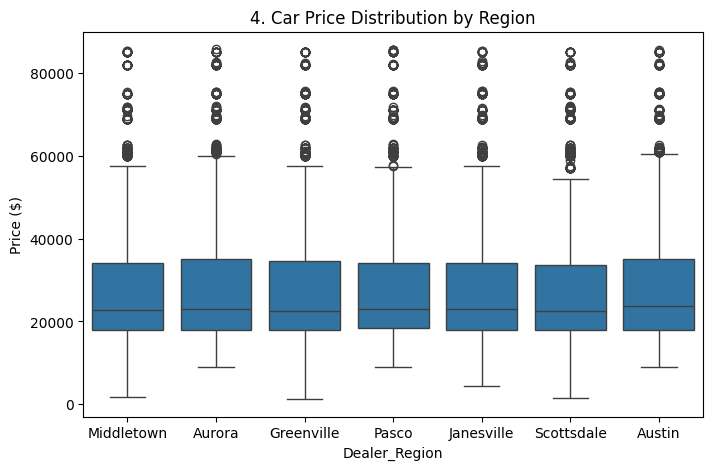

In [5]:
# 4. What is the distribution of car prices across different regions?
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Dealer_Region"], y=df["Price ($)"])
plt.title("4. Car Price Distribution by Region")
plt.show()

In [6]:
# 5. What is the distribution Of cars based on body styles?
body_style_counts = df["Body Style"].value_counts()
print("5. Car Distribution by Body Style:\n", body_style_counts)

5. Car Distribution by Body Style:
 Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [7]:
# 6. How does the average selling price of cars vary by customer gender and annual income?
avg_price_by_gender_income = df.groupby(["Gender"])["Price ($)"].mean()
print("6. Average Selling Price by Gender and Income:\n", avg_price_by_gender_income)


6. Average Selling Price by Gender and Income:
 Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64


In [8]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
car_count_by_region = df["Dealer_Region"].value_counts()
print("7. Cars Sold by Region:\n", car_count_by_region)


7. Cars Sold by Region:
 Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


In [9]:
# 8. How does the average car price differ between cars with different engine sizes?
avg_price_by_engine = df.groupby("Engine")["Price ($)"].mean()
print("8. Average Car Price by Engine Size:\n", avg_price_by_engine)

8. Average Car Price by Engine Size:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


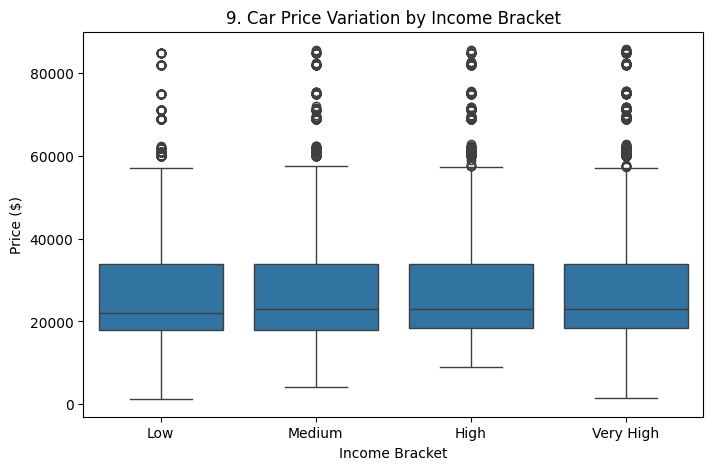

In [10]:
# 9. How do car prices vary based on the customer's annual income bracket?
income_brackets = pd.qcut(df["Annual Income"], q=4, labels=["Low", "Medium", "High", "Very High"])
df["Income Bracket"] = income_brackets
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Income Bracket"], y=df["Price ($)"])
plt.title("9. Car Price Variation by Income Bracket")
plt.show()

In [11]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_5_models = df["Model"].value_counts().head(5)
print("10. Top 5 Car Models with Highest Sales:\n", top_5_models)

10. Top 5 Car Models with Highest Sales:
 Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


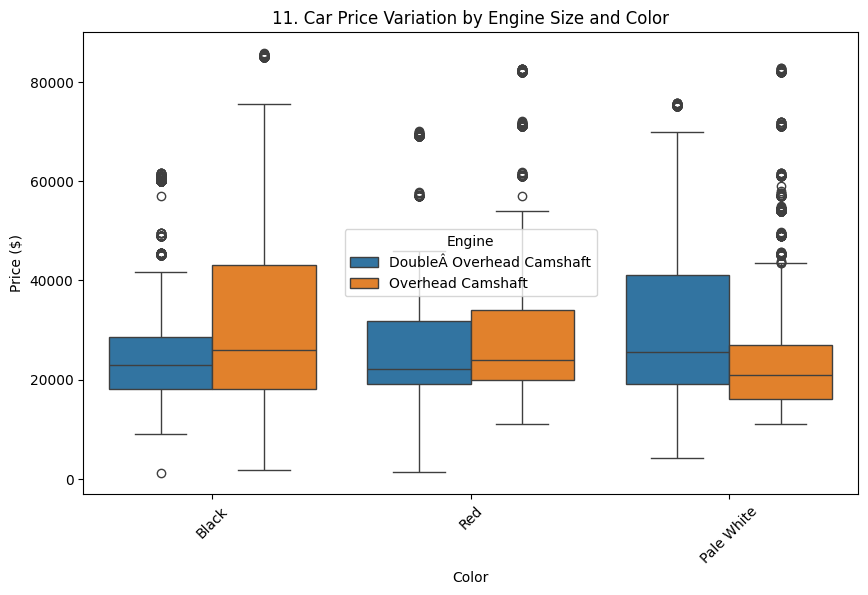

In [12]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price
# variation?
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Color"], y=df["Price ($)"], hue=df["Engine"])
plt.title("11. Car Price Variation by Engine Size and Color")
plt.xticks(rotation=45)
plt.show()

In [13]:
# 12. Is there any seasonal trend in car sales based on the date of sale?
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
monthly_sales = df.groupby("Month").size()
print("12. Monthly Car Sales Trend:\n", monthly_sales)

12. Monthly Car Sales Trend:
 Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
dtype: int64


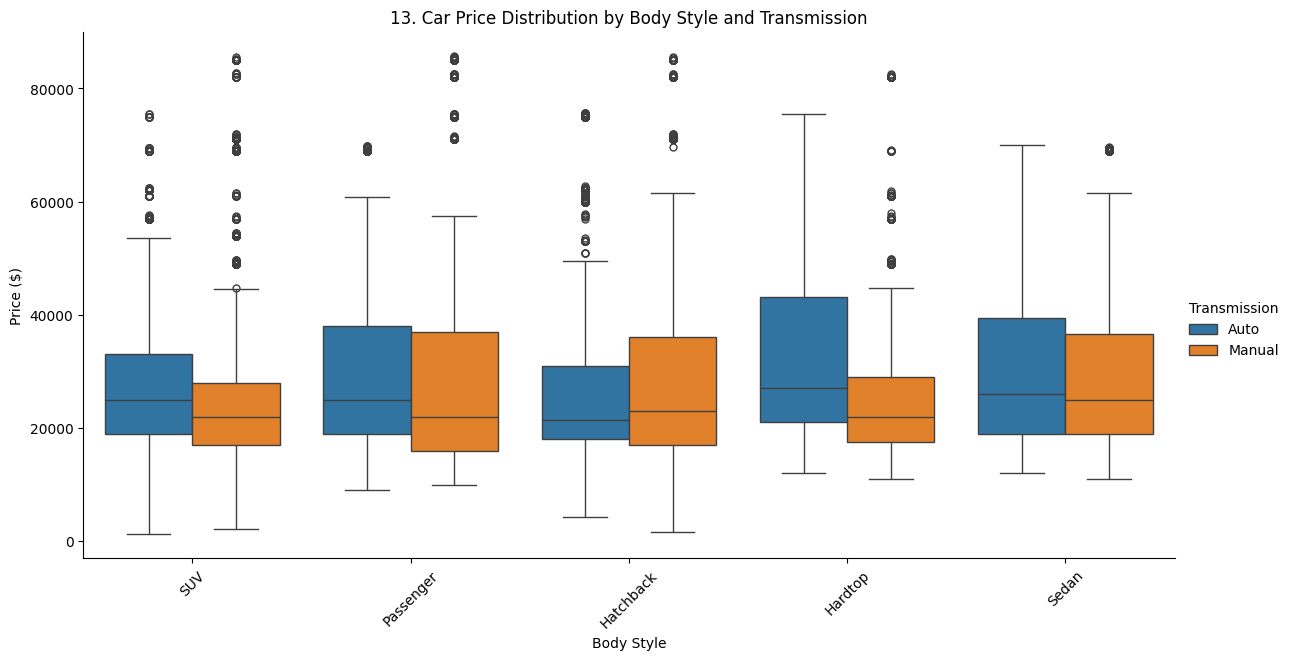

In [14]:
# 13. How does the car price distribution change when considering different combinations of body style and
# transmission type?
g = sns.catplot(x="Body Style", y="Price ($)", hue="Transmission", kind="box", data=df, height=6, aspect=2)
g.set_xticklabels(rotation=45)
plt.title("13. Car Price Distribution by Body Style and Transmission")
plt.show()

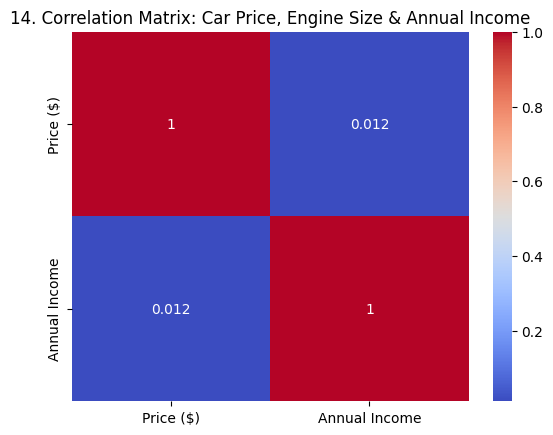

In [15]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these
# features interact?
correlation_matrix = df[["Price ($)", "Annual Income"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("14. Correlation Matrix: Car Price, Engine Size & Annual Income")
plt.show()

In [16]:
# 15. How does the average car price vary across different car models and engine types?
avg_price_model_engine = df.groupby(["Model", "Engine"])["Price ($)"].mean()
print("15. Average Car Price by Model and Engine:\n", avg_price_model_engine)

15. Average Car Price by Model and Engine:
 Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64
